youtube 이수안 컴퓨터
XGBoost, LightGBM

In [48]:
import pandas as pd
import numpy as np
#from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score,recall_score

import xgboost as xgb
from xgboost import XGBRFClassifier,XGBRFRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])


In [49]:
df=pd.read_csv('final_fire_weather_7yr.csv')

In [50]:
df.columns

Index(['산불발생여부', '발생장소_시도', '관측일', '평균기온', '일최고기온', '일최고기온시각', '일최저기온',
       '일최저기온시각', '일평균현지기압', '일최고현지기압', '일최고현지기압시각', '일최저현지기압', '일최저현지기압시각',
       '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압', '일최저해면기압시각', '일평균상대습도',
       '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압', '일최고수증기압시각', '일최저수증기압',
       '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각', '일최대풍속풍향', '일최대순간풍속',
       '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량', '일평균중하층운량', '최다운량', '최다운량시각',
       '일합계일조시간', '일합계일사량', '일평균지면온도'],
      dtype='object')

In [51]:
df=df.rename(columns={'산불발생여부':'Fire','발생장소_시도':'location', '관측일':'Date', '평균기온':'avgT',
                   '일최고기온':'dayMaxT','일최고기온시각':'dayMaxT_hr','일최저기온':'dayMinT',
      '일최저기온시각':'dayMinT_hr', '일평균현지기압':'dayAvgP', '일최고현지기압':'dayMaxP', 
      '일최고현지기압시각':'dayMaxP_hr', '일최저현지기압':'dayMinP', '일최저현지기압시각':'dayMinP_hr',
      '일평균해면기압':'dayAvgPsea','일최고해면기압':'dayMaxPsea', '일최고해면기압시각':'dayMaxPsea_hr',
      '일최저해면기압':'dayMinPsea','일최저해면기압시각':'dayMinPsea_hr','일평균상대습도':'dayAvgRhm',
      '일최소상대습도':'dayMinRhm','일최소상대습도시각':'dayMinRhm_hr','일평균수증기압':'dayAvgWaterP',
      '일최고수증기압':'dayMaxWaterP','일최고수증기압시각':'dayMaxWaterP_hr','일최저수증기압':'dayMinWaterP',
      '일최저수증기압시각':'dayMinWaterP_hr','일평균풍속':'dayAvgWS','일최대풍속':'dayMaxWS',
      '일최대풍속시각':'dayMasWS_hr','일최대풍속풍향':'dayMaxWSWD','일최대순간풍속':'dayMaxInsWS',
      '일최대순간풍속시각':'dayMaxInsWS_hr','일최대순간풍속풍향':'dayMaxInsWSWD','풍정합':'hr24sumRws',
      '일평균전운량':'dayAvgCloud','일평균중하층운량':'dayAvgMiddleLowCloud','최다운량':'maxCloud',
      '최다운량시각':'maxCloud_hr','일합계일조시간':'sumSS_hr','일합계일사량':'daySumSunRay',
      '일평균지면온도':'dayAvgGroundT'})

In [52]:
df.columns

Index(['Fire', 'location', 'Date', 'avgT', 'dayMaxT', 'dayMaxT_hr', 'dayMinT',
       'dayMinT_hr', 'dayAvgP', 'dayMaxP', 'dayMaxP_hr', 'dayMinP',
       'dayMinP_hr', 'dayAvgPsea', 'dayMaxPsea', 'dayMaxPsea_hr', 'dayMinPsea',
       'dayMinPsea_hr', 'dayAvgRhm', 'dayMinRhm', 'dayMinRhm_hr',
       'dayAvgWaterP', 'dayMaxWaterP', 'dayMaxWaterP_hr', 'dayMinWaterP',
       'dayMinWaterP_hr', 'dayAvgWS', 'dayMaxWS', 'dayMasWS_hr', 'dayMaxWSWD',
       'dayMaxInsWS', 'dayMaxInsWS_hr', 'dayMaxInsWSWD', 'hr24sumRws',
       'dayAvgCloud', 'dayAvgMiddleLowCloud', 'maxCloud', 'maxCloud_hr',
       'sumSS_hr', 'daySumSunRay', 'dayAvgGroundT'],
      dtype='object')

In [53]:
#변수지정
# x = df[['평균기온', '일최고기온', '일최고기온시각', '일최저기온',
#        '일최저기온시각', '일평균현지기압', '일평균해면기압', '일최고해면기압', '일최고해면기압시각', '일최저해면기압',
#        '일최저해면기압시각', '일평균상대습도', '일최소상대습도', '일최소상대습도시각', '일평균수증기압', '일최고수증기압',
#        '일최고수증기압시각', '일최저수증기압', '일최저수증기압시각', '일평균풍속', '일최대풍속', '일최대풍속시각',
#        '일최대풍속풍향', '일최대순간풍속', '일최대순간풍속시각', '일최대순간풍속풍향', '풍정합', '일평균전운량',
#        '일평균중하층운량', '최다운량', '최다운량시각', '일합계일조시간', '일합계일사량', '일평균지면온도']]
x=df[['avgT','dayMaxT','dayMaxT_hr','dayMinT',
      'dayMinT_hr','dayAvgP','dayAvgPsea','dayMaxPsea','dayMaxPsea_hr','dayMinPsea',
      'dayMinPsea_hr','dayAvgRhm','dayMinRhm','dayMinRhm_hr','dayAvgWaterP','dayMaxWaterP',
      'dayMaxWaterP_hr','dayMinWaterP','dayMinWaterP_hr','dayAvgWS','dayMaxWS','dayMasWS_hr',
      'dayMaxWSWD','dayMaxInsWS','dayMaxInsWS_hr','dayMaxInsWSWD','hr24sumRws','dayAvgCloud',
      'dayAvgMiddleLowCloud','maxCloud','maxCloud_hr','sumSS_hr','daySumSunRay','dayAvgGroundT']]
y = df[['Fire']]

In [54]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=123)
#파이썬 기반의 XGBoost가 가지고 있는 고유의 구조를 가지는 클래스를 가지고 있음
dtrain=xgb.DMatrix(data=X_train, label=y_train)
dtest=xgb.DMatrix(data=X_test, label=y_test)

In [55]:
params={
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds=400

In [56]:
evals=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, 
                    early_stopping_rounds=100, evals=evals)

[00:45:29] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.64670	eval-logloss:0.64918
[1]	train-logloss:0.60903	eval-logloss:0.61343
[2]	train-logloss:0.57754	eval-logloss:0.58370
[3]	train-logloss:0.55109	eval-logloss:0.55878
[4]	train-logloss:0.52840	eval-logloss:0.53742
[5]	train-logloss:0.50949	eval-logloss:0.51919
[6]	train-logloss:0.49291	eval-logloss:0.50391
[7]	train-logloss:0.47868	eval-logloss:0.49120
[8]	train-logloss:0.46621	eval-logloss:0.48052
[9]	train-logloss:0.45521	eval-logloss:0.47023
[10]	train-logloss:0.44580	eval-logloss:0.46234
[11]	train-logloss:0.43757	e

In [57]:
predicts=xgb_model.predict(dtest)
np.round(predicts[:10],3)

array([0.067, 0.879, 0.019, 0.266, 0.038, 0.868, 0.011, 0.787, 0.021,
       0.116], dtype=float32)

In [58]:
preds=[1 if x>0.5 else 0 for x in predicts]
preds[:10]

[0, 1, 0, 0, 0, 1, 0, 1, 0, 0]

In [59]:
print('정확도:{}'.format(accuracy_score(y_test,preds)))
print('정밀도:{}'.format(precision_score(y_test,preds)))
print('재현율:{}'.format(recall_score(y_test,preds)))

정확도:0.8374205267938238
정밀도:0.7228260869565217
재현율:0.5095785440613027


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

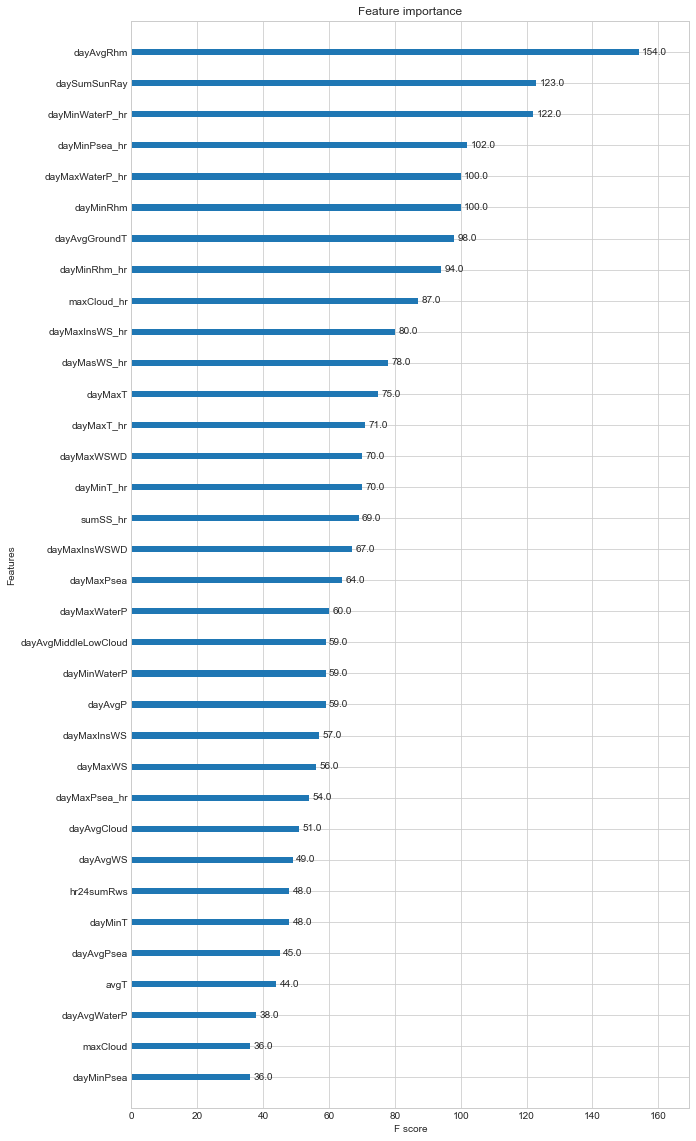

In [60]:
fig, ax=plt.subplots(figsize=(10,20))
plot_importance(xgb_model,ax=ax)